In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.datasets import mnist

In [3]:
#loading dataset
(x_train, y_train ), (x_test, y_test) = mnist.load_data()

# Resize training and test images to 7x7
x_train = tf.image.resize(x_train[..., tf.newaxis], [7, 7]).numpy()
x_test = tf.image.resize(x_test[..., tf.newaxis], [7, 7]).numpy()

# Remove the channel dimension if needed
#x_train_resized = x_train_resized.squeeze()
#x_test_resized = x_test_resized.squeeze()

# Normalization of x_train and y_train
x_train = x_train / 255
x_test = x_test /255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Number =  5


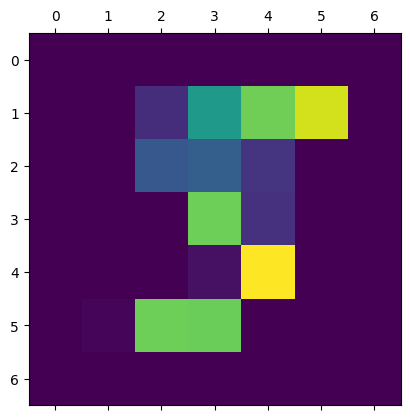

Number =  0


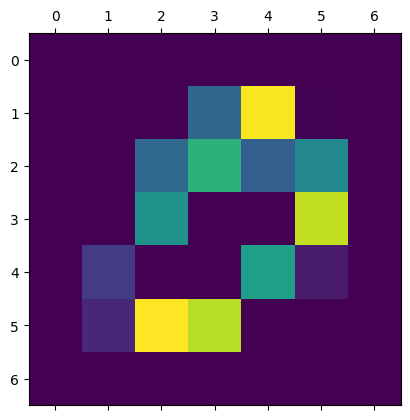

Number =  4


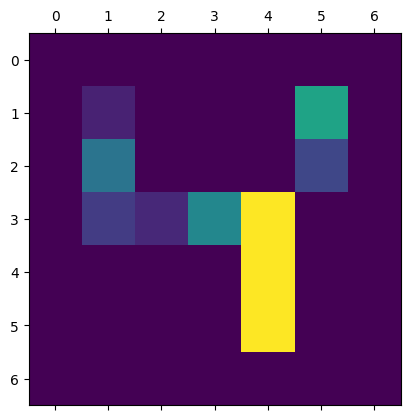

Number =  1


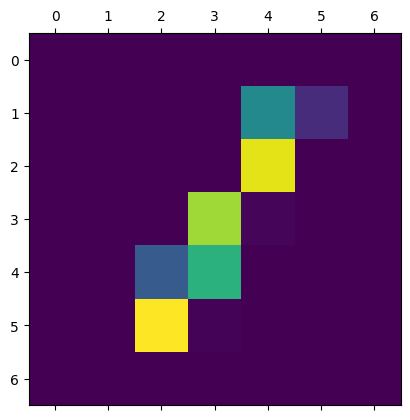

Number =  9


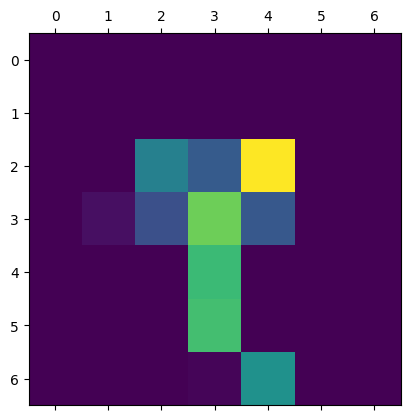

In [4]:
# to see the images present in x_train and mnist dataset
for i in range(5):
    plt.matshow(x_train[i])
    print("Number = ", y_train[i])
    plt.show()

In [5]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape = (7, 7)),
    Dense(3, activation = 'gelu'),
    Dense(3, activation = 'gelu'),
    Dense(10, activation = 'softmax')]

)
model.summary()

/Users/charlie/.local/share/mise/installs/python/3.11.14/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            40 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202 (808.00 B)

 Trainable params: 202 (808.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {test_accuracy*100} % \nTest Loss : {test_loss}')

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - accuracy: 0.3845 - loss: 1.7510 - val_accuracy: 0.5164 - val_loss: 1.3567
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step - accuracy: 0.5393 - loss: 1.2838 - val_accuracy: 0.5701 - val_loss: 1.1894
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - accuracy: 0.5743 - loss: 1.1847 - val_accuracy: 0.5975 - val_loss: 1.1228
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step - accuracy: 0.6031 - loss: 1.1274 - val_accuracy: 0.6227 - val_loss: 1.0702
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step - accuracy: 0.6282 - loss: 1.0708 - val_accuracy: 0.6561 - val_loss: 1.0090
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.6534 - loss: 1.0211 - val_accuracy: 0.6719 - val_loss: 0.9684
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 0.6625 - loss: 0.9951 - val_accuracy: 0.6813 - val_loss: 0.9500
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.6660 -

In [7]:
weights_and_biases = model.get_weights()    

In [8]:
weights = []
biases = []
for i, arr in enumerate(weights_and_biases):
    if i % 2 == 0:
        weights.append(arr)
    else:
        biases.append(arr)
print(weights)
print(biases)

[array([[ 2.8780559e-01,  9.9615820e-02, -8.3891726e-01],
       [ 1.7971767e+00,  7.3607999e-01, -1.3719293e+00],
       [ 2.3366284e+00,  7.8466034e-01, -3.0962069e+00],
       [ 3.0292802e+00,  1.0694647e+00, -2.9941256e+00],
       [ 2.5416193e+00,  6.3958693e-01, -4.2901716e+00],
       [ 2.6578639e+00,  8.3052218e-02, -4.5736384e+00],
       [ 2.9770252e-01,  7.1300715e-01, -1.5429939e-01],
       [ 2.1168053e-01, -1.3443270e-01,  9.7401059e-01],
       [ 3.5539868e-01,  2.7296093e-01,  7.1264446e-01],
       [ 5.5924845e-01,  2.9772860e-01,  6.9561946e-01],
       [ 5.7700795e-01,  2.7831292e-01,  6.3255119e-01],
       [ 3.0187431e-01,  3.7844922e-02,  3.0175981e-01],
       [-1.3602734e-01, -2.1982086e-01,  1.1918961e-01],
       [ 9.4240862e-01, -1.1976827e+00,  1.5502518e+00],
       [-1.5845773e+00,  7.3195493e-01,  3.7001414e+00],
       [ 9.3936965e-02,  2.9852614e-01,  6.2363952e-01],
       [-7.4080296e-02, -2.7564475e-01,  1.8239971e-01],
       [ 2.6204056e-01, -9.067

In [11]:
np.savez('verysmallnn_weights.npz',
         W1=weights[0], b1=biases[0],
         W2=weights[1], b2=biases[1],
         W3=weights[2], b3=biases[2]
)

print("Weights successfully saved to 'verysmallnn_weights.npz'")

Weights successfully saved to 'verysmallnn_weights.npz'
